## Working on A Police DataSets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
data = pd.read_csv('Police Data.csv')

In [5]:
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [15]:
data.isnull().sum()

stop_date                0
stop_time                0
driver_gender         4061
driver_age_raw        4054
driver_age            4307
driver_race           4060
violation_raw         4060
violation             4060
search_conducted         0
stop_outcome          4060
is_arrested           4060
stop_duration         4060
drugs_related_stop       0
dtype: int64

In [13]:
data.drop( columns = 'search_type', inplace = True)

In [14]:
data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False


## FInd the gender that Speed the Most

In [17]:
data[data.violation == 'Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

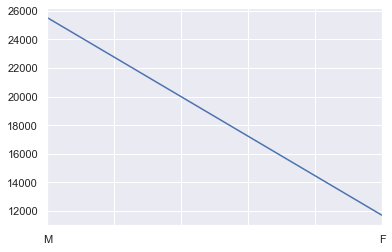

In [18]:
data[data.violation == 'Speeding'].driver_gender.value_counts().plot()

## Does gender affect who searched during a stop

In [19]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [20]:
data.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366.0
M    2113.0
Name: search_conducted, dtype: float64

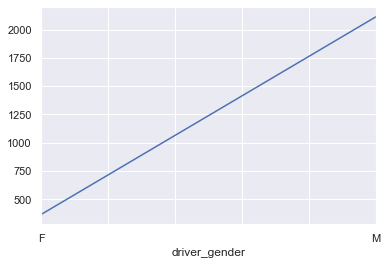

In [21]:
data.groupby('driver_gender').search_conducted.sum().plot()

In [22]:
data.search_conducted.value_counts()

False    63056
True      2479
Name: search_conducted, dtype: int64

## Compare the age distribution for each violation

In [24]:
data.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


In [25]:
data['driver_age'].value_counts()

22.0    2912
21.0    2886
20.0    2783
23.0    2725
24.0    2583
        ... 
15.0       5
84.0       3
88.0       2
83.0       2
85.0       1
Name: driver_age, Length: 73, dtype: int64

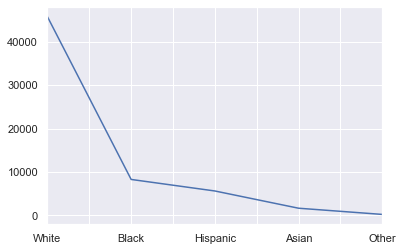

In [28]:
data['driver_race'].value_counts().plot()

In [29]:
data['driver_race'].value_counts()

White       45747
Black        8267
Hispanic     5611
Asian        1639
Other         211
Name: driver_race, dtype: int64

In [30]:
data['stop_outcome'].value_counts()

Citation            56564
Arrest Driver        2009
Warning              1889
N/D                   423
No Action             339
Arrest Passenger      251
Name: stop_outcome, dtype: int64

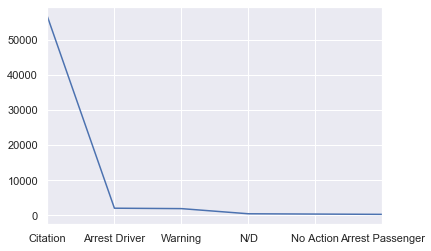

In [31]:
data['stop_outcome'].value_counts().plot()

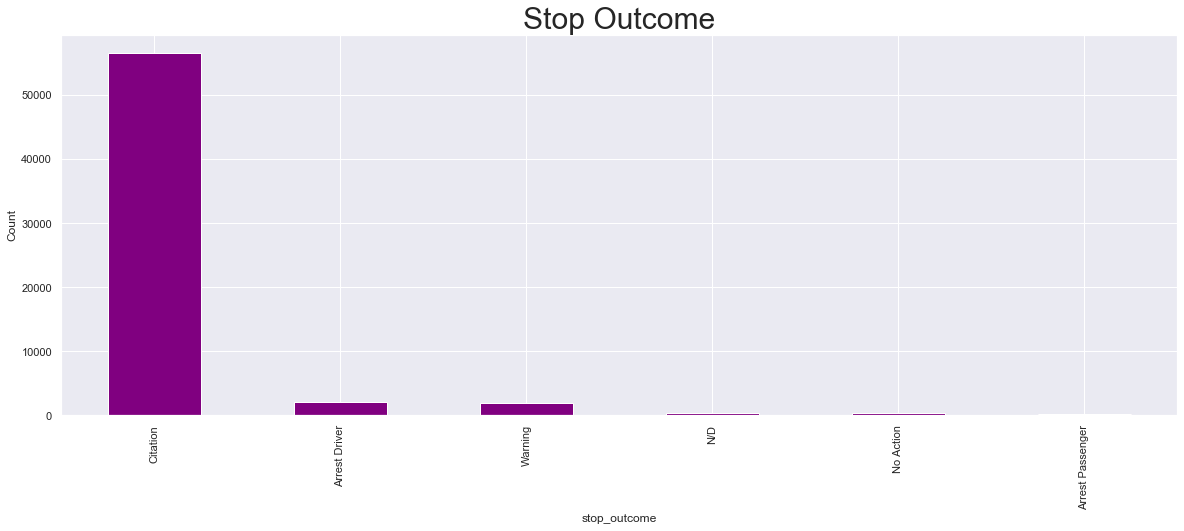

In [34]:
data['stop_outcome'].value_counts().plot.bar(color = 'purple', figsize = (20, 7));
plt.title('Stop Outcome', fontsize = 30, fontweight = 20)
plt.xlabel('stop_outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
data.plot(x='driver_age', y='driver_age_raw', kind ='bar')